In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import time
# %matplotlib inline

In [3]:
# import argparse
# parser = argparse.ArgumentParser(description='manual to this script')
# parser.add_argument('--epoch_size',type=int,default=10)
# parser.add_argument('--batch_size',type=int,default=360)
# args = parser.parse_args()
# epoch_size = args.epoch_size
# batch_size = args.batch_size
# print("epoch=%s,batch_size=%s"%(epoch_size,batch_size))

In [58]:
epoch_size = 10
batch_size = 360
print("epoch=%s,batch_size=%s"%(epoch_size,batch_size))

epoch=10,batch_size=360


In [5]:
months=13
DIR_ROOT = "/Users/stardust/StardustJavaProjects/JavaTest";

In [6]:
data_bed = []
for i in range(1,months+1):
    data_ = pd.read_csv(DIR_ROOT + "/{}bed_level.txt.csv".format(i),header=None)
    data_.columns = ['x','y','bed_level']
    data_bed.append(data_)

In [7]:
len(data_bed)

13

In [8]:
data_bed[12]

,x,y,bed_level
0,518693.195313,3.368709e+06,20.538614
1,518732.648438,3.368797e+06,21.723602
2,518775.289063,3.368875e+06,20.020536
3,518825.367188,3.368948e+06,22.505301
4,518882.789063,3.369016e+06,24.735243
...,...,...,...
35995,527137.609375,3.382640e+06,24.382263
35996,527168.234375,3.382688e+06,24.036366
35997,527196.937500,3.382736e+06,24.412762
35998,527224.312500,3.382784e+06,24.797714


In [9]:
data_ = []
data_.append(data_bed[4].iloc[30100:30103])
data_.append(data_bed[4].iloc[30103:30106])
data_

[                   x             y  bed_level
 30100  522042.382813  3.373878e+06   1.290496
 30101  522061.484375  3.373906e+06   1.910207
 30102  522081.414063  3.373936e+06   2.595494,
                    x             y  bed_level
 30103  522102.250000  3.373968e+06   3.270399
 30104  522124.039063  3.374001e+06   3.694517
 30105  522146.820313  3.374036e+06   3.781859]

In [10]:
data_bed.count

<function list.count(value, /)>

In [11]:
data_sedmiment = []
for i in range(1,months+1):
    data_ = pd.read_csv(DIR_ROOT + "/{}sediment_concentration.xyz.csv".format(i),header=None)
    data_.columns = ['x','y','sand_z','concentration']
    data_sedmiment.append(data_)
data_sedmiment[4].iloc[30100:30200,:]

,x,y,sand_z,concentration
30100,522042.382813,3.373878e+06,6.676435,0.009027
30101,522061.484375,3.373906e+06,6.985826,0.011448
30102,522081.414063,3.373936e+06,7.327604,0.015275
30103,522102.250000,3.373968e+06,7.663913,0.021059
30104,522124.039063,3.374001e+06,7.874988,0.025316
...,...,...,...,...
30195,526429.359375,3.380550e+06,8.695766,0.001340
30196,526444.468750,3.380588e+06,8.839143,0.001267
30197,526459.171875,3.380626e+06,9.053247,0.001326
30198,526473.546875,3.380663e+06,9.320088,0.001703


In [12]:
data_sedmiment[4].count

<bound method DataFrame.count of                    x             y     sand_z  concentration
0      518693.195313  3.368709e+06  20.538614            0.0
1      518732.648438  3.368797e+06  21.723602            0.0
2      518775.289063  3.368875e+06  20.020536            0.0
3      518825.367188  3.368948e+06  22.505301            0.0
4      518882.789063  3.369016e+06  24.735243            0.0
...              ...           ...        ...            ...
35995  527137.609375  3.382640e+06  24.382263            0.0
35996  527168.234375  3.382688e+06  24.036366            0.0
35997  527196.937500  3.382736e+06  24.412762            0.0
35998  527224.312500  3.382784e+06  24.797714            0.0
35999  527250.968750  3.382832e+06  24.585445            0.0

[36000 rows x 4 columns]>

In [13]:
data_velocity = []
for i in range(1,months+1):
    data_ = pd.read_csv(DIR_ROOT + "/{}velocity.xyz.csv".format(i),header=None)
    data_.columns = ['x','y','x_velocity','y_velocity','xy_velocity']
    data_velocity.append(data_)
data_velocity[4].iloc[30100:30200,:]

,x,y,x_velocity,y_velocity,xy_velocity
30100,522042.382813,3.373878e+06,0.397100,0.496184,0.635521
30101,522061.484375,3.373906e+06,0.404101,0.503862,0.645890
30102,522081.414063,3.373936e+06,0.414820,0.513693,0.660269
30103,522102.250000,3.373968e+06,0.426268,0.519740,0.672186
30104,522124.039063,3.374001e+06,0.430343,0.520641,0.675471
...,...,...,...,...,...
30195,526429.359375,3.380550e+06,0.310145,0.348087,0.466213
30196,526444.468750,3.380588e+06,0.292949,0.353607,0.459192
30197,526459.171875,3.380626e+06,0.276159,0.366597,0.458974
30198,526473.546875,3.380663e+06,0.267360,0.382961,0.467055


In [14]:
data_water_depth = []
for i in range(1,months+1):
    data_ = pd.read_csv(DIR_ROOT + "/{}water_depth.xyz.csv".format(i),header=None)
    data_.columns = ['x','y','water_depth']
    data_water_depth.append(data_)
data_water_depth[4].iloc[30100:30200,:]

,x,y,water_depth
30100,522042.382813,3.373878e+06,10.771878
30101,522061.484375,3.373906e+06,10.151239
30102,522081.414063,3.373936e+06,9.464220
30103,522102.250000,3.373968e+06,8.787028
30104,522124.039063,3.374001e+06,8.360943
...,...,...,...
30195,526429.359375,3.380550e+06,6.401565
30196,526444.468750,3.380588e+06,6.114544
30197,526459.171875,3.380626e+06,5.685476
30198,526473.546875,3.380663e+06,5.149618


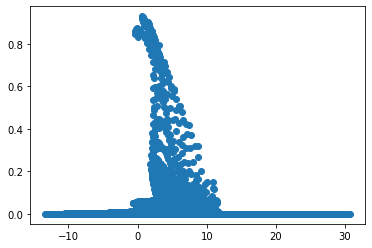

In [15]:
plt.scatter(data_bed[4].iloc[:,2],data_sedmiment[4].iloc[:,3])

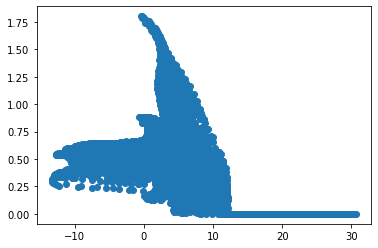

In [16]:
plt.scatter(data_bed[4].iloc[:,2],data_velocity[4].iloc[:,4])

In [17]:
data_sedmiment[4].iloc[0:3,3]

0    0.0
1    0.0
2    0.0
Name: concentration, dtype: float64

In [18]:
data_bed[4].iloc[0:3,2]

0    20.538614
1    21.723602
2    20.020536
Name: bed_level, dtype: float64

In [19]:
data_all = []
for i in range(0,months):
    print(i)
    data_ = pd.concat([data_bed[i],data_sedmiment[i].iloc[:,2:4],data_velocity[i].iloc[:,2:5],data_water_depth[i].iloc[:,2]],axis=1)
    data_all.append(data_)

0
1
2
3
4
5
6
7
8
9
10
11
12


In [20]:
data_all[:100]

[                   x             y  bed_level     sand_z  concentration  \
 0      518693.195313  3.368709e+06  20.538614  20.538614            0.0   
 1      518732.648438  3.368797e+06  21.723602  21.723602            0.0   
 2      518775.289063  3.368875e+06  20.020536  20.020536            0.0   
 3      518825.367188  3.368948e+06  22.505301  22.505301            0.0   
 4      518882.789063  3.369016e+06  24.735243  24.735243            0.0   
 ...              ...           ...        ...        ...            ...   
 35995  527137.609375  3.382640e+06  24.382263  24.382263            0.0   
 35996  527168.234375  3.382688e+06  24.036366  24.036366            0.0   
 35997  527196.937500  3.382736e+06  24.412762  24.412762            0.0   
 35998  527224.312500  3.382784e+06  24.797714  24.797714            0.0   
 35999  527250.968750  3.382832e+06  24.585445  24.585445            0.0   
 
        x_velocity  y_velocity  xy_velocity  water_depth  
 0             0.0         

In [21]:
len(data_all)

13

In [22]:
step_len = 11
predict_len = 1
data_len = 36000

In [91]:
data_all[4].iloc[30100]

x                5.220424e+05
y                3.373878e+06
bed_level        1.290496e+00
sand_z           6.676435e+00
concentration    9.027000e-03
x_velocity       3.971000e-01
y_velocity       4.961840e-01
xy_velocity      6.355210e-01
water_depth      1.077188e+01
Name: 30100, dtype: float64

In [24]:
data_step = []
for i in range(0,months-step_len-predict_len+1):
    print(i)
    for index, row in data_all[i].iterrows():
        data_ = []
        for j in range(0,step_len+predict_len):
            data_.append(data_all[i+j].iloc[index])
        data_step.append(data_)

0
1


In [95]:
data_step[30100]

array([[5.22042383e+05, 3.37387781e+06, 1.22472500e+00, 6.57947400e+00,
        0.00000000e+00, 2.08365000e-01, 2.59817000e-01, 3.33048000e-01,
        1.07094990e+01],
       [5.22042383e+05, 3.37387781e+06, 1.22536700e+00, 6.57424000e+00,
        0.00000000e+00, 1.91482000e-01, 2.38328000e-01, 3.05721000e-01,
        1.06977470e+01],
       [5.22042383e+05, 3.37387781e+06, 1.22549500e+00, 6.59779800e+00,
        0.00000000e+00, 2.72734000e-01, 3.39174000e-01, 4.35227000e-01,
        1.07446050e+01],
       [5.22042383e+05, 3.37387781e+06, 1.26121900e+00, 6.61260900e+00,
        0.00000000e+00, 2.68384000e-01, 3.33830000e-01, 4.28337000e-01,
        1.07027790e+01],
       [5.22042383e+05, 3.37387781e+06, 1.29049600e+00, 6.67643500e+00,
        9.02700000e-03, 3.97100000e-01, 4.96184000e-01, 6.35521000e-01,
        1.07718780e+01],
       [5.22042383e+05, 3.37387781e+06, 1.58849800e+00, 6.87098300e+00,
        4.17760000e-02, 5.17979000e-01, 6.48373000e-01, 8.29874000e-01,
        1.0

In [26]:
data_step = np.array(data_step)

In [59]:
tf.random.set_seed(1)

In [27]:
data_step.shape

(72000, 12, 9)

In [28]:
x = data_step[:, :-predict_len, :]
y = data_step[:, -predict_len, 2]

In [29]:
x.shape,y.shape

((72000, 11, 9), (72000,))

In [89]:
x[30100:30101],y[30100:30101],months,len(data_all)

(array([[[5.22042383e+05, 3.37387781e+06, 1.22472500e+00, 6.57947400e+00,
          0.00000000e+00, 2.08365000e-01, 2.59817000e-01, 3.33048000e-01,
          1.07094990e+01],
         [5.22042383e+05, 3.37387781e+06, 1.22536700e+00, 6.57424000e+00,
          0.00000000e+00, 1.91482000e-01, 2.38328000e-01, 3.05721000e-01,
          1.06977470e+01],
         [5.22042383e+05, 3.37387781e+06, 1.22549500e+00, 6.59779800e+00,
          0.00000000e+00, 2.72734000e-01, 3.39174000e-01, 4.35227000e-01,
          1.07446050e+01],
         [5.22042383e+05, 3.37387781e+06, 1.26121900e+00, 6.61260900e+00,
          0.00000000e+00, 2.68384000e-01, 3.33830000e-01, 4.28337000e-01,
          1.07027790e+01],
         [5.22042383e+05, 3.37387781e+06, 1.29049600e+00, 6.67643500e+00,
          9.02700000e-03, 3.97100000e-01, 4.96184000e-01, 6.35521000e-01,
          1.07718780e+01],
         [5.22042383e+05, 3.37387781e+06, 1.58849800e+00, 6.87098300e+00,
          4.17760000e-02, 5.17979000e-01, 6.4837300

In [31]:
split=36000 * (12 - step_len)

In [72]:
train_x = np.nan_to_num(x[:split])
train_y = y[:split]
test_x = np.nan_to_num(x[split:])
test_y = y[split:]

In [73]:
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((36000, 11, 9), (36000,), (36000, 11, 9), (36000,))

In [88]:
train_x[30100:30101],train_y[30100:30101]

(array([[[-4.93673849e+01, -2.38930285e+02, -2.06829348e-01,
          -3.71867085e-01,             nan,  1.83597498e-01,
           7.18628782e-02,  9.18518055e-02, -1.97021516e-01],
         [-4.93673849e+01, -2.38930285e+02, -2.07310558e-01,
          -3.72082403e-01, -4.95536712e-01,  2.24532681e-01,
           9.18020632e-02,  5.25653653e-02, -1.95915506e-01],
         [-4.93673849e+01, -2.38930285e+02, -2.07717025e-01,
          -3.72904422e-01, -1.79048562e-01,  1.96971069e-02,
          -8.70751260e-02, -1.05052525e-01, -1.96292856e-01],
         [-4.93673849e+01, -2.38930285e+02, -2.08249126e-01,
          -3.73207109e-01, -4.80119257e-02, -8.73632799e-03,
          -9.93277119e-02, -1.10723450e-01, -1.95229505e-01],
         [-4.93673849e+01, -2.38930285e+02, -2.08752544e-01,
          -3.74658303e-01, -2.61386956e-02, -6.16180054e-02,
          -1.35267592e-01, -1.42353448e-01, -1.96611409e-01],
         [-4.93673849e+01, -2.38930285e+02, -2.10022399e-01,
          -3.767252

In [75]:
mean = train_x.mean(axis=0)
std = train_x.std(axis=0)
train_max = train_x.max(axis=0)
train_min = train_x.min(axis=0)
mean.shape

(11, 9)

In [86]:
train_min

array([[ 5.17614758e+05,  3.36870919e+06, -1.33387220e+01,
        -7.27294000e-01,  0.00000000e+00, -1.06784000e-01,
        -1.35020000e-02,  0.00000000e+00,  0.00000000e+00],
       [ 5.17614758e+05,  3.36870919e+06, -1.33387220e+01,
        -7.28569000e-01,  0.00000000e+00, -1.02338000e-01,
        -1.27690000e-02,  0.00000000e+00,  0.00000000e+00],
       [ 5.17614758e+05,  3.36870919e+06, -1.33387210e+01,
        -7.23475000e-01,  0.00000000e+00, -1.64433000e-01,
        -1.93870000e-02,  0.00000000e+00,  0.00000000e+00],
       [ 5.17614758e+05,  3.36870919e+06, -1.33383020e+01,
        -7.23779000e-01,  0.00000000e+00, -1.57450000e-01,
        -1.88480000e-02,  0.00000000e+00,  0.00000000e+00],
       [ 5.17614758e+05,  3.36870919e+06, -1.33378730e+01,
        -7.13008000e-01,  0.00000000e+00, -2.50724000e-01,
        -2.64730000e-02,  0.00000000e+00,  0.00000000e+00],
       [ 5.17614758e+05,  3.36870919e+06, -1.32822000e+01,
        -6.74442000e-01,  0.00000000e+00, -3.104280

In [81]:
train_x = (train_x - mean)/(train_max - train_min)
test_x = (test_x - mean)/(train_max - train_min)
train_x[:1],train_y[:1]

(array([[[-4.93674148e+01, -2.38930311e+02, -1.96866010e-01,
          -3.57724418e-01,             nan, -7.73810982e-01,
          -1.28138183e+00, -1.33050955e+00, -2.13855255e-01],
         [-4.93674148e+01, -2.38930311e+02, -1.97347551e-01,
          -3.57935582e-01, -4.95536712e-01, -8.26317386e-01,
          -1.28939177e+00, -1.10909824e+00, -2.12734173e-01],
         [-4.93674148e+01, -2.38930311e+02, -1.97754085e-01,
          -3.58776885e-01, -1.79048562e-01, -4.65221526e-01,
          -6.83846167e-01, -6.01466544e-01, -2.13171554e-01],
         [-4.93674148e+01, -2.38930311e+02, -1.98304425e-01,
          -3.59094855e-01, -4.80119257e-02, -3.58415754e-01,
          -4.98291813e-01, -4.39994757e-01, -2.12044430e-01],
         [-4.93674148e+01, -2.38930311e+02, -1.98822752e-01,
          -3.60601091e-01, -3.65597776e-02, -2.65896052e-01,
          -3.72316720e-01, -3.38085861e-01, -2.13507177e-01],
         [-4.93674148e+01, -2.38930311e+02, -2.00221571e-01,
          -3.628311

In [82]:
model = tf.keras.Sequential()
model.add(layers.LSTM(32,return_sequences=True, input_shape=(train_x.shape[1:]), ))
model.add(layers.LSTM(16,return_sequences=True))
model.add(layers.LSTM(8))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 11, 32)            5376      
_________________________________________________________________
lstm_10 (LSTM)               (None, 11, 16)            3136      
_________________________________________________________________
lstm_11 (LSTM)               (None, 8)                 800       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 9,321
Trainable params: 9,321
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.compile(optimizer='adam',
              loss='mae'
)

In [84]:
time_begin = time.time()
history = model.fit(train_x, train_y, batch_size = batch_size, epochs=epoch_size, verbose=1)
time_end = time.time()
print("fit cost time: %.2f s"%(time_end - time_begin))

Epoch 1/10
100/100 [==============================] - 1s 14ms/step - loss: nan
Epoch 2/10
100/100 [==============================] - 1s 14ms/step - loss: nan
Epoch 3/10
100/100 [==============================] - 2s 15ms/step - loss: nan
Epoch 4/10
100/100 [==============================] - 1s 14ms/step - loss: nan
Epoch 5/10
100/100 [==============================] - 1s 14ms/step - loss: nan
Epoch 6/10
100/100 [==============================] - 1s 14ms/step - loss: nan
Epoch 7/10
100/100 [==============================] - 1s 14ms/step - loss: nan
Epoch 8/10
100/100 [==============================] - 1s 14ms/step - loss: nan
Epoch 9/10
100/100 [==============================] - 1s 14ms/step - loss: nan
Epoch 10/10
100/100 [==============================] - 1s 15ms/step - loss: nan
fit cost time: 17.53 s


In [40]:
history.history.get('loss')[-5:]

[nan]

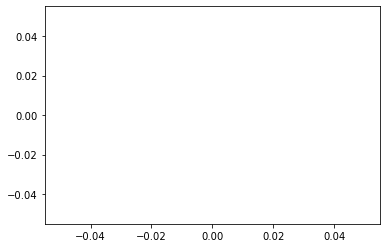

In [41]:
plt.plot(history.epoch, history.history.get('loss'))

In [57]:
test_x

array([[[-0.39807338, -0.39537868,  0.26363229, ..., -0.39040291,
         -0.43387452, -0.20569996],
        [-0.39807338, -0.39537868,  0.26316144, ..., -0.37841449,
         -0.37605538, -0.20462084],
        [-0.39807338, -0.39537868,  0.26276395, ..., -0.2939434 ,
         -0.29084703, -0.20504469],
        ...,
        [-0.39807338, -0.39537868,  0.26207748, ..., -0.28721754,
         -0.32698963, -0.20164352],
        [-0.39807338, -0.39537868,  0.26171447, ..., -0.16646312,
         -0.19365901, -0.20052752],
        [-0.39807338, -0.39537868,  0.26137222, ..., -0.2455864 ,
         -0.30447069, -0.19938905]],

       [[-0.39434865, -0.38915634,  0.29054649, ..., -0.39040291,
         -0.43387452, -0.20569996],
        [-0.39434865, -0.38915634,  0.29007565, ..., -0.37841449,
         -0.37605538, -0.20462084],
        [-0.39434865, -0.38915634,  0.28967815, ..., -0.2939434 ,
         -0.29084703, -0.20504469],
        ...,
        [-0.39434865, -0.38915634,  0.28959852, ..., -

In [56]:
result = model.predict(test_x, batch_size=batch_size)
result = pd.DataFrame(result)
result_y = pd.DataFrame(test_y)
result = pd.concat([result,result_y],axis=1)
result

,0,0
0,NaN,20.538614
1,NaN,21.723602
2,NaN,20.020536
3,NaN,22.505301
4,NaN,24.735243
...,...,...
35995,NaN,24.382263
35996,NaN,24.036366
35997,NaN,24.412762
35998,NaN,24.797714


In [44]:
test_y

array([20.538614, 21.723602, 20.020536, ..., 24.412762, 24.797714,
       24.585445])

In [45]:
evaluate_result = model.evaluate(test_x,test_y)
print(evaluate_result)

1125/1125 [==============================] - 2s 2ms/step - loss: nan
nan


In [54]:
result_save = pd.DataFrame(result)
result_save.to_csv(DIR_ROOT + str(epoch_size) + "SandWaterLSTMTest.csv")
print(result_save[8630:8670])

       0          0
8630 NaN  -3.184303
8631 NaN  -3.526288
8632 NaN  -4.117174
8633 NaN  -4.754453
8634 NaN  -5.308677
8635 NaN  -5.832083
8636 NaN  -6.282992
8637 NaN  -6.463263
8638 NaN  -5.585868
8639 NaN  -0.575524
8640 NaN   8.833398
8641 NaN   9.258107
8642 NaN   8.956196
8643 NaN   7.747399
8644 NaN   6.524829
8645 NaN   5.738035
8646 NaN   5.336702
8647 NaN   5.275166
8648 NaN   5.385376
8649 NaN   5.615054
8650 NaN   5.964448
8651 NaN   6.373296
8652 NaN   6.789522
8653 NaN   7.196412
8654 NaN   7.590178
8655 NaN   7.959760
8656 NaN   8.283836
8657 NaN   8.535892
8658 NaN   8.904062
8659 NaN   9.242686
8660 NaN   9.522832
8661 NaN   9.482802
8662 NaN   8.791049
8663 NaN  11.048597
8664 NaN  11.403473
8665 NaN  11.968417
8666 NaN  12.337642
8667 NaN  13.138453
8668 NaN  13.254626
8669 NaN  13.762703
